# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\babsab\Google Drive\Courses\Springboard\EDA\human_temp\data\human_body_temperature.csv')

In [2]:
# Your work here.

df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


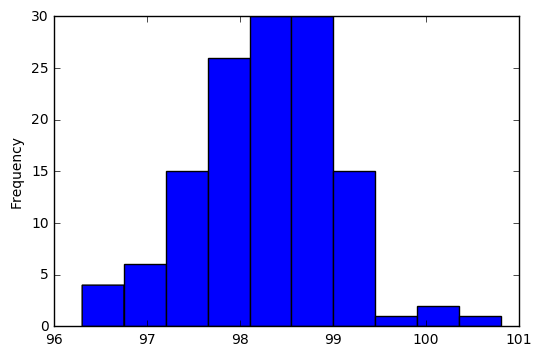

In [3]:
%matplotlib inline
df['temperature'].plot(kind='hist')

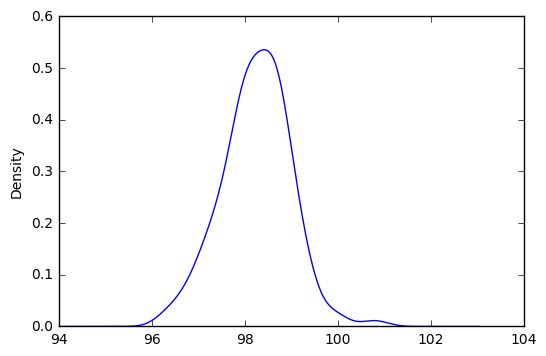

In [4]:
ax = df['temperature'].plot(kind='density')



In [5]:
mu1 = df['temperature'].mean()
std1 = df['temperature'].std()
print 'human body temp mean = ', mu1, 'std = ', std1

human body temp mean =  98.2492307692 std =  0.733183158039


In [6]:
import numpy
import scipy.stats
import matplotlib.pyplot as pyplot
temp_norm = scipy.stats.norm(mu1, std1)

In [7]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

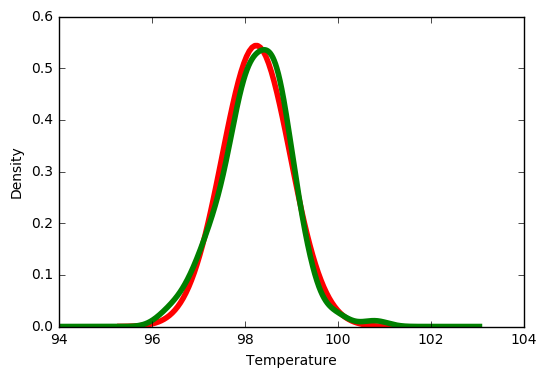

In [8]:
xs, ys = eval_pdf(temp_norm)
pyplot.plot(xs, ys, label='normal', linewidth=4, color='r')

ax_line = ax.get_lines()
ya = ax_line[0].get_ydata()
xa = ax_line[0].get_xdata()
pyplot.plot(xa, ya, label='actual', linewidth=4, color='g')
pyplot.ylabel('Density')
pyplot.xlabel('Temperature')

## Is the distribution Normal?

We plotted the sample distribution with the normal distribution of the same mean and std deviation.
We see that both distributions are very similar to each other. Therefore, we conclude that the
sample is normally distributed.

In [9]:
samp_sz = len(df)
print 'the sample size is', samp_sz

the sample size is 130


## Is the sample size large enough?

Yes, the sample size is greater than 30. It's large enough for z-test.



In [10]:
# standard error or the std-dev of the sampling distribution of the mean

std_err = std1/(samp_sz**(0.5))
print std_err

0.0643044168379


## Is the true population mean really 98.6 degrees F?
   To answer this, we will compute the confidence interval of the population mean and then see if 
   98.6 degress F falls in that interval.
- ### Would you use a one-sample or two-sample test? Why?
   To answer this question, I'd use a one sample test because I am trying to find the confidence intervals
   of the population mean and not comparing two independent groups.
- ### In this situation, is it appropriate to use the t or z statistic?
   In this situation, it is appropriate to use the z statistic because sample size is greater than 30 and we are not
   comparing independent groups.

In [11]:
# Lets compute a 95% confidence interval

#The interval z value is 1.96
# Therefore the width of the interval is 

ci_width = 1.96 * std_err
print ci_width
print 'the range of population mean with 95% confidence is [', mu1-ci_width, ',' , mu1+ci_width, ']'

0.126036657002
the range of population mean with 95% confidence is [ 98.1231941122 , 98.3752674262 ]


In [12]:
# To repeat the test with t statistic, we interpolate the values in the t-table

t_95val = 1.65675160
ci_widtht = t_95val * std_err
print ci_widtht
print 'the range of population mean with 95% confidence is [', mu1-ci_widtht, ',' , mu1+ci_widtht, ']'

0.106536445483
the range of population mean with 95% confidence is [ 98.1426943237 , 98.3557672147 ]


As the value 98.6 does not fall within the 95% confidence interval. 
Therefore, according to this sample, the population mean temperature cannot be 98.6

### At what temperature should we consider someone's temperature to be "abnormal"?

A value below 98.12 and above 98.36 may be considered abnormal on the basis of the confidence interval.

### Is there a significant difference between males and females in normal temperature?
### What test did you use and why?
   To answer this question, we need to compare the male and female groups. For this purpose we will
   use the two sample t test

In [13]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [14]:
dfm = df.groupby('gender').mean()
dfm

,temperature,heart_rate
gender,,
F,98.393846,74.153846
M,98.104615,73.369231


In [15]:
m_f = dfm.iloc[0,0]
m_m = dfm.iloc[1,0]

In [16]:
dfc = df.groupby('gender').count()
dfc

,temperature,heart_rate
gender,,
F,65,65
M,65,65


In [17]:
n_f = dfc.iloc[0,0]
n_m = dfc.iloc[1,0]

In [18]:
dfs = df.groupby('gender').std()
dfs

,temperature,heart_rate
gender,,
F,0.743488,8.105227
M,0.698756,5.875184


In [19]:
s_f = dfs.iloc[0,0]
s_m = dfs.iloc[1,0]

In [20]:
# let's now compute the t-statistic for the two groups

t_stat = (m_f - m_m) / (s_f**2/n_f + s_m**2/n_m)**(1/2)
t_stat

0.28923076923072699

In [21]:
# the degrees of freedom

dof = (n_f-1 + n_m-1)
dof

128

In [22]:
# for 128 dof, the t_crit
t_crit = 1.657

As t_stat < t_crit , there is no significant difference between males and females in normal body temperature.